In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Average value spent on wine for each level of education:
Education
Master    333.075676
PhD       404.495885
Name: MntWines, dtype: float64


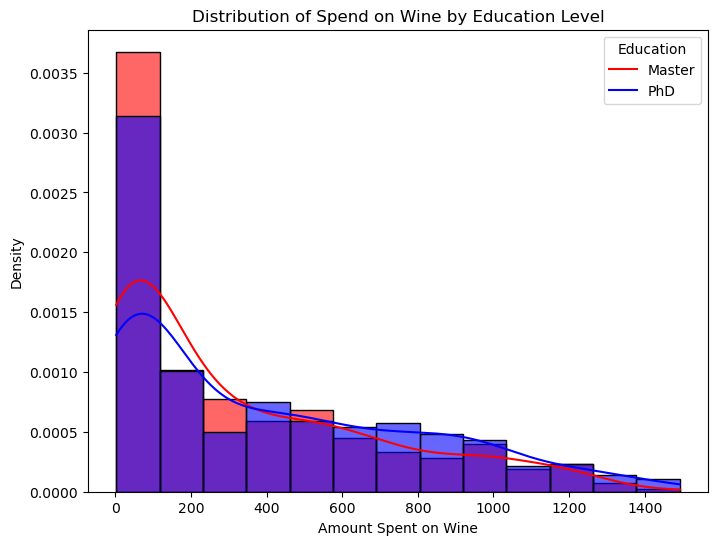

In [19]:
filtered_df = df[df.Education.isin(['Master', 'PhD'])]

# Create overlapping distributions with red and blue colors and transparency
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='MntWines', hue='Education', kde=True, stat='density',
             common_norm=False, palette={'Master': 'red', 'PhD': 'blue'}, alpha=0.6)

# Calculate average value spent on wine for each level of education
avg_spent = filtered_df.groupby('Education')['MntWines'].mean()
print("Average value spent on wine for each level of education:")
print(avg_spent)

# Show the plot
plt.title('Distribution of Spend on Wine by Education Level')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Density')
plt.legend(title='Education', labels=['Master', 'PhD'])

plt.show()


In [28]:
data = filtered_df 

In [29]:
num_permutations = 1000

# Extract wine spend for 'PhD' and 'Master' students
phd_wine_spend = data.loc[data['Education'] == 'PhD', 'MntWines'].values
master_wine_spend = data.loc[data['Education'] == 'Master', 'MntWines'].values

# Observed mean difference to test 
observed_mean_diff = np.mean(phd_wine_spend) - np.mean(master_wine_spend)

# Concatenate the wine spend data
all_wine_spend = data['MntWines'].values

# Initialize an array to store permuted mean differences
permuted_mean_diffs = np.zeros(num_permutations)

# Permutation loop
for i in range(num_permutations):
    # Permute the wine spend values
    permuted_wine_spend = np.random.permutation(all_wine_spend)
    
    # Collect new permuted samples for PhD and Master
    permuted_phd_wine_spend = permuted_wine_spend[data['Education'] == 'PhD']
    permuted_master_wine_spend = permuted_wine_spend[data['Education'] == 'Master']
    permuted_mean_diffs[i] = np.mean(permuted_phd_wine_spend) - np.mean(permuted_master_wine_spend)

# Calculate p-value
p_value = np.sum(np.abs(permuted_mean_diffs) >= np.abs(observed_mean_diff)) / num_permutations

print("Observed Mean Difference:", observed_mean_diff)
print("Permutation Test p-value:", p_value)


Observed Mean Difference: 71.42020909798691
Permutation Test p-value: 0.006


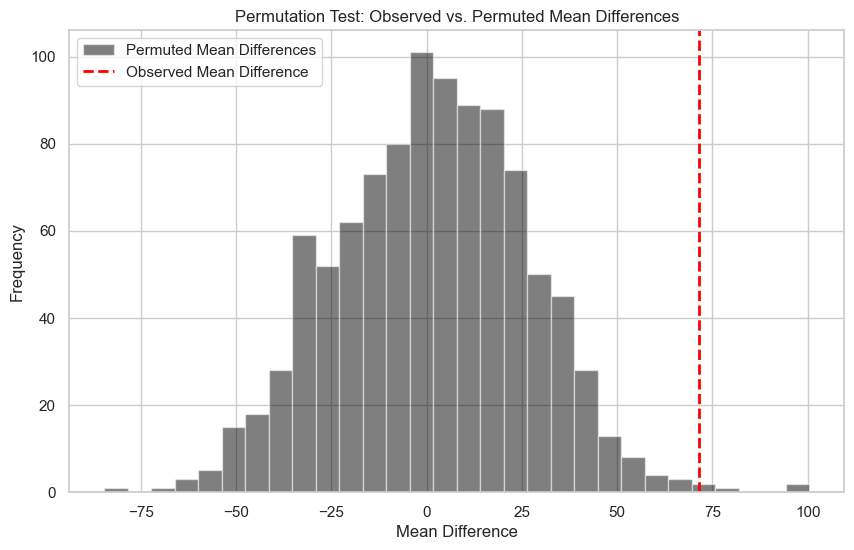

In [32]:
plt.figure(figsize=(10, 6))


plt.hist(permuted_mean_diffs, bins=30, alpha=0.5, label='Permuted Mean Differences', color='black')
plt.axvline(x=observed_mean_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Difference')
plt.title('Permutation Test: Observed vs. Permuted Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:
t_stat, p_value = ttest_ind(phd_wine_spend, master_wine_spend, equal_var=False)

print("Welch's t-statistic:", t_stat)
print("Welch's t-test p-value:", p_value)

Welch's t-statistic: 2.7962335627265507
Welch's t-test p-value: 0.00528994208127416


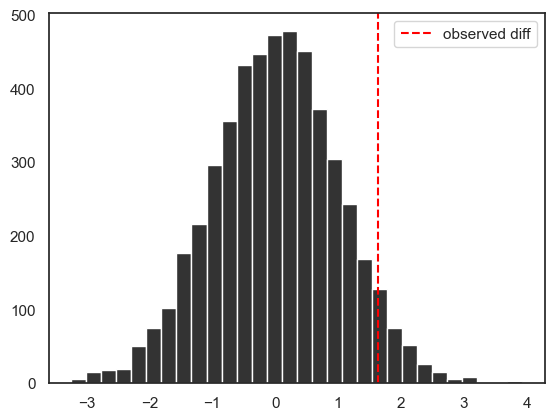

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

sns.set(style="white")


# Create dummy data
np.random.seed(42)
data = np.random.normal(size=5000)

# Calculate the 95th percentile
percentile_95 = np.percentile(data, 95)

# Create smoothed histogram
sns.histplot(data, bins=30, color='black', alpha=.8)

# Add a red vertical line at the 95th percentile
plt.axvline(x=percentile_95, color='red', linestyle='--', label='observed diff')

# Set title and labels
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Add legend
plt.legend()

# Show the plot
plt.show()
